### Created by de Paula, Tales Ferraz, 2022

*Contact info*: ferrazdepaula@ifsc.usp.br

In this notebook, I create, compile and train a *deep learning* model using convolution neural network (CNN) for predicting the output of *fasion MNIST* dataset, and any other clothing you want! So, lets jump into it!

#### Dependencies:
- pip install numpy
- pip install tensorflow
- pip install -U matplotlib
- pip install pandas
- pip install -U scikit-learn
- pip install -U albumentations

#### Importing libraries

In [ ]:
# Helpers libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import albumentations as A # for image augmentation

In [ ]:
# TensorFlow and tf. Keras libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### If using Google Colab
uncomment the line below

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


### If using GPU
uncomment the line below

In [ ]:
# from tensorflow.compat.v1 import ConfigProto
# from tensorflow.compat.v1 import InteractiveSession

# config                          = ConfigProto()
# config.gpu_options.allow_growth = True
# session                         = InteractiveSession(config=config)

# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11568025749913238198
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 40231960576
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4974461065311558356
physical_device_desc: "device: 0, name: A100-SXM4-40GB, pci bus id: 0000:00:04.0, compute capability: 8.0"
xla_global_id: 416903419
]
Found GPU at: /device:GPU:0


### Loading dataset
Lucky for me, the data set is already in the *TensorFlow*'s *Keras*. We simply need to call it (easy as pie!)

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

class_names = ['T-shirt/top', 
               'Trouser',
               'Pullover',
               'Dress',
               'Coat',
               'Sandal',
               'Shirt',
               'Sneaker',
               'Bag',
               'Ankle boot']

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
#check pixel range
print("Pixel range foes from", np.min(x_train), "to", np.max(x_train))

Pixel range foes from 0 to 255


#### Scaling the data based on max value of pixels

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
np.shape(x_train[0]) #here we can check the shape, just to see if everything is in order

(28, 28)

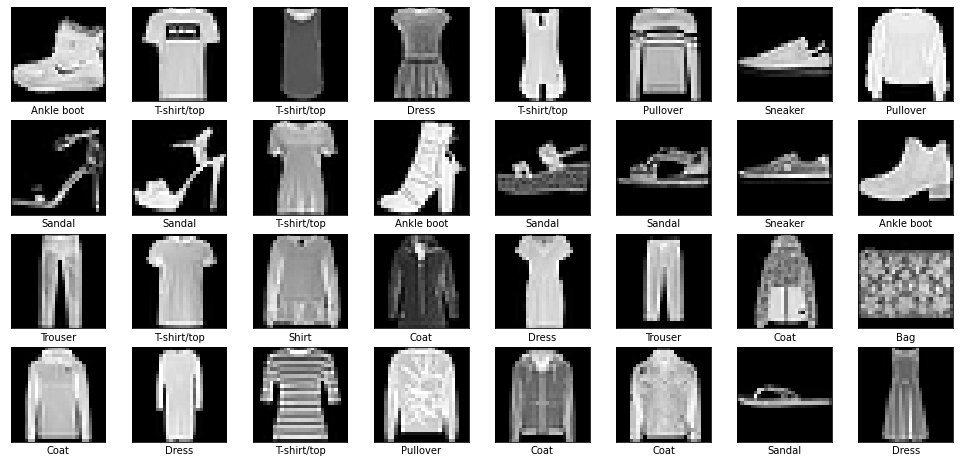

In [ ]:
# and here I plot some images just for visualization

plt.figure(figsize=(17,8))

for i in range(32):
    plt.subplot(4,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], plt.get_cmap('gray'))
    plt.xlabel(class_names[y_train[i]])

### Data Augmentation (or preprocessing, if you want)
This is for not overfiting our model. We want scrambled images, zoomed in, zoomed out, upside down and stuff like that (be crazy!).


In [ ]:
x_train.setflags(write = 1) # in case you can't write to the images


Actually, I chose not to do this step, because I was running out of time (I would need to retrain the model and all the other things)! But this should increase our accuracy for other images outside from our dataset.

In [ ]:
'''
In this case, we will only do some horizontal fliping, and some basic rotations.
'''
# transform = A.Compose([A.HorizontalFlip(p=0.3),  # horizontal flip, with probability of 50%
#                        A.Rotate(45, p=0.3)])      # 45° rotation, with prob. of 50%

In [ ]:
# for i in range(len(x_train)):
  
#   x_train[i] = transform(image = x_train[i])['image']

In [ ]:
y_train # just to check ;)

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## Building the CNN
#### Objective: 
I will do a *Model* using the *Funcional API* for a more complex architecture.

In [ ]:
'''
CNN creation
'''
def conv_model(num_filters, fs, dp, nn):

  input = keras.layers.Input(shape=(28,28,1))
  x = keras.layers.Conv2D(num_filters, fs, padding = "same")(input)        # filters, kernel size and padding changed
  x = keras.layers.BatchNormalization()(x)                                 # layer that normalizes its inputs
  x = keras.layers.MaxPooling2D(3)(x)                                      # our good old pooling
  x = keras.layers.Dropout(dp)(x)                                          # helps prevent overfitting
  x = keras.layers.PReLU()(x)                                              # Parametric Rectified Linear Unit

  x = keras.layers.Conv2D(num_filters, fs, padding = "same")(x)            
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.MaxPooling2D(3)(x)   
  x = keras.layers.Dropout(dp)(x)
  x = keras.layers.PReLU()(x)
  
  x = keras.layers.Conv2D(num_filters, fs, padding = "same")(x)
  x = keras.layers.BatchNormalization()(x) 
  x = keras.layers.MaxPooling2D(3)(x)  
  x = keras.layers.Dropout(dp)(x)
  x = keras.layers.PReLU()(x)

  x = keras.layers.Flatten()(x)                                            # tensor/matrix to a vector
  
  '''
  Full conection (ANN) 
  '''

  x = keras.layers.Dense(nn, activation = 'relu')(x)                       # hidden layer (number of neurons) 
  output = keras.layers.Dense(10, activation = 'softmax')(x)               # 10 for 10 classes output

  model = keras.models.Model(input, output, name = "conv_net")
  return model

In [ ]:
model = conv_model(nn = 50, num_filters = 300, fs = 3, dp = 0.6)           # in case I change my mind and wanted to change the hyperparameters

In [ ]:
model.summary()                                                            # to see some important parameters

Model: "conv_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 300)       3000      
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 300)      1200      
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 9, 300)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 9, 9, 300)         0         
                                                                 
 p_re_lu (PReLU)             (None, 9, 9, 300)         243

In [ ]:
# tf.keras.backend.clear_session() # important for memory management, if you want to change the model

In [ ]:
model.compile(optimizer= keras.optimizers.Adam(learning_rate=0.001),
              loss="sparse_categorical_crossentropy",
              metrics =['accuracy'])
# sparse for numerical classes (gives the class number)

In [ ]:
# what if we want some class weights??


In [ ]:
 cnn = model.fit(x_train,y_train, validation_data=(x_test,y_test), batch_size = 64, epochs=50)
                                                                   # good batch size, and epoch number
'''
validation data its used for applying in the test set for a preview (only). It is not used for balancing the weights, so it does not matter if the val_data uses
the test set, as it is just for visualization
'''


Epoch 1/50
938/938 [==============================] - 16s 6ms/step - loss: 0.9238 - accuracy: 0.6662 - val_loss: 0.4935 - val_accuracy: 0.8160
Epoch 2/50
938/938 [==============================] - 6s 6ms/step - loss: 0.5365 - accuracy: 0.8012 - val_loss: 0.4189 - val_accuracy: 0.8443
Epoch 3/50
938/938 [==============================] - 6s 6ms/step - loss: 0.4543 - accuracy: 0.8338 - val_loss: 0.3735 - val_accuracy: 0.8599
Epoch 4/50
938/938 [==============================] - 6s 6ms/step - loss: 0.4089 - accuracy: 0.8512 - val_loss: 0.3482 - val_accuracy: 0.8692
Epoch 5/50
938/938 [==============================] - 6s 6ms/step - loss: 0.3727 - accuracy: 0.8652 - val_loss: 0.3132 - val_accuracy: 0.8875
Epoch 6/50
938/938 [==============================] - 6s 6ms/step - loss: 0.3505 - accuracy: 0.8736 - val_loss: 0.3006 - val_accuracy: 0.8909
Epoch 7/50
938/938 [==============================] - 6s 6ms/step - loss: 0.3311 - accuracy: 0.8808 - val_loss: 0.2841 - val_accuracy: 0.8970
Epoch

In [ ]:
model.save('path/to/save/file/name') # VERY IMPORTANT! This is the model used for the API

In [ ]:
cnn_model = tf.keras.models.load_model('path/to/load/file/name')

#### Using the CNN to predict the test values

In [ ]:
y_pred = cnn_model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


#### And plotting some metrics (accuracy and loss)

In [ ]:
var_epochs = list(range(1,51))

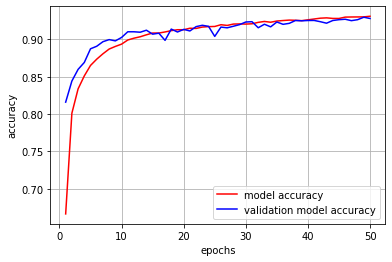

In [ ]:
plt.plot(var_epochs, cnn.history['accuracy'], c = 'r', label = 'model accuracy')
plt.plot(var_epochs, cnn.history['val_accuracy'], c = 'b', label = 'validation model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()

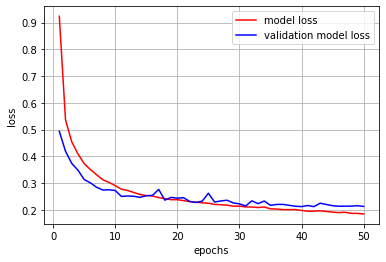

In [ ]:
plt.plot(var_epochs, cnn.history['loss'], c = 'r', label = 'model loss')
plt.plot(var_epochs, cnn.history['val_loss'], c = 'b', label = 'validation model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.show()

As we can see, from 30 to 50 epochs, we have a slow increase in our accuracy, showing that after about 30 epochs, the model converged!